In [6]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [7]:
import dipolelosses
import potentials
import constants
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels

In [8]:
B_values = np.logspace(-3,1,50)

pot      = potentials.Silvera_Triplet
T        = 5e-4

GVsB_H=[]
GVsB_T=[]

for c in DipoleChannels:
    Gs=[]
    for B in B_values:
        Gs.append(dipolelosses.GetGFactor(c,  B, constants.HydrogenConstants(), T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
    GVsB_H.append(np.array(Gs))
    Gs=[]

    for B in B_values:
        Gs.append(dipolelosses.GetGFactor(c,  B, constants.TritiumConstants(), T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=0,lout=2))
    GVsB_T.append(np.array(Gs))


In [9]:
# Uncomment one of these lines for preferred x-axis convention.

# To make the plots with real B on x axis
#B_display=B_values

# To make the plots with Stoof scaled B on x axis
B_display=dipolelosses.B_Naught(B_values)

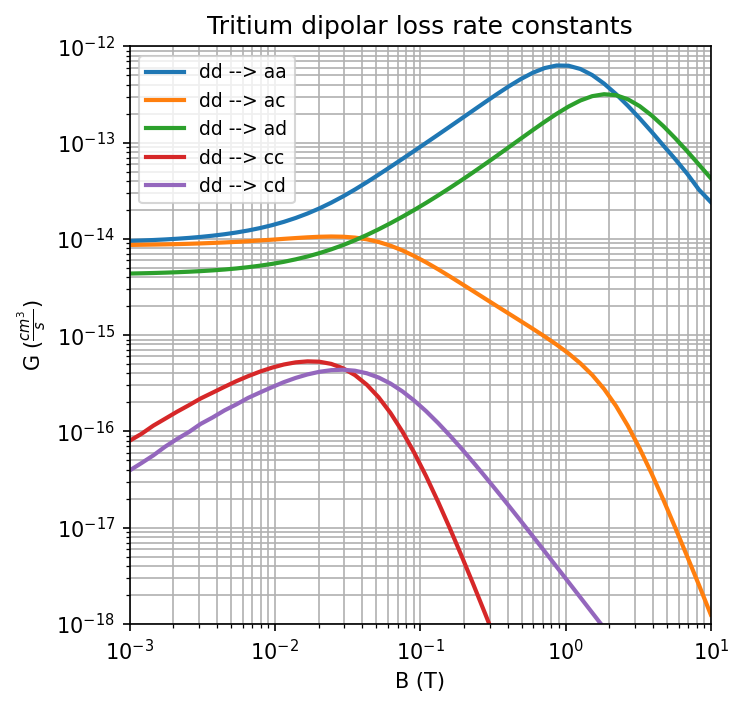

In [15]:
B_corrected = dipolelosses.B_Naught(B_values)
plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(DipoleChannels)):
    Label='dd --> '+str(DipoleChannels[ci]['alphaprime'])+str(DipoleChannels[ci]['betaprime'])
    plt.plot(B_values,GVsB_T[ci],label=Label,linewidth=2)
    plt.semilogy()
plt.xlabel("B (T)")
plt.xlim(0.001, 10)
plt.ylabel(r'G ($\frac{cm^3}{s}$)')
plt.ylim(1e-18, 1e-12)
plt.title("Tritium dipolar loss rate constants")
plt.grid(which='both')
plt.legend(fontsize=9)
plt.loglog()
plt.show()

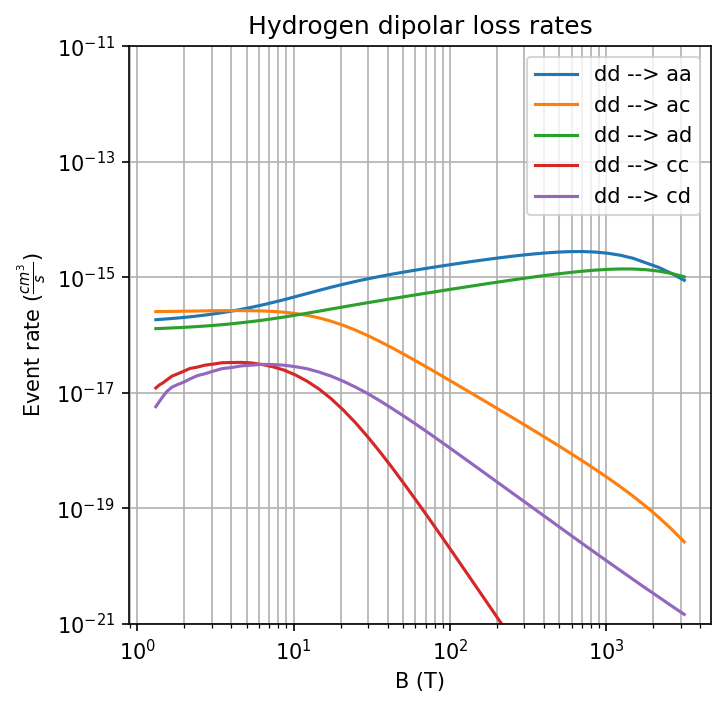

In [11]:


plt.figure(figsize=(5,5),dpi=150)
for ci in range(0,len(DipoleChannels)):
    Label='dd --> '+str(DipoleChannels[ci]['alphaprime'])+str(DipoleChannels[ci]['betaprime'])
    plt.plot(B_display,GVsB_H[ci],label=Label)
    plt.semilogy()
plt.xlabel("B (T)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Event rate ($\frac{cm^3}{s}$)')
plt.ylim(1e-21, 1e-11)
plt.title("Hydrogen dipolar loss rates")
plt.grid(which='both')
plt.legend()
plt.loglog()
plt.show()